In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

In [17]:
# Filter for Data Analyst Roles
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()
# Drop NaN Values in Salaries
df_DA = df_DA.dropna(subset=['salary_year_avg'])
# Explode Method to get each skill of skills list in a single row
df_explode = df_DA.explode('job_skills')


In [19]:
df_DA_skills = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
DA_job_count = len(df_DA) # Find count of Data Analyst jobs in Germany with salary info

df_DA_skills['skill_percent'] = df_DA_skills['count'] / DA_job_count * 100
df_DA_skills


,count,median,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
...,...,...,...
selenium,1,82500.0,0.018345
colocation,1,67500.0,0.018345
cordova,1,113269.5,0.018345


In [22]:
skill_limit = 5

df_DA_top_skills = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]
df_DA_top_skills

,count,median,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
power bi,1042,90000.0,19.115759
sas,1006,90000.0,18.455329
word,523,80000.0,9.594570
powerpoint,518,85000.0,9.502844


In [27]:
!pip install adjustText

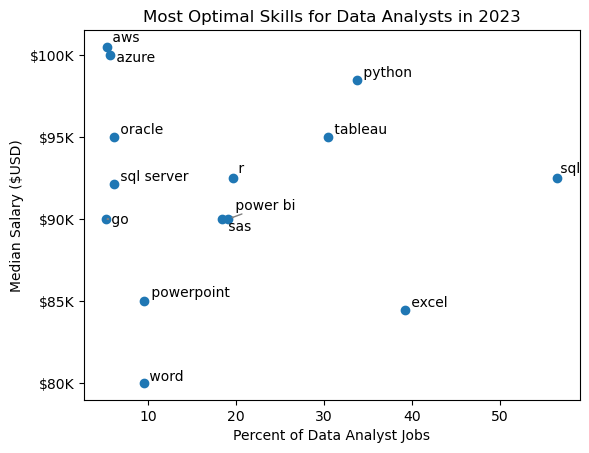

In [29]:
from adjustText import adjust_text

plt.scatter(df_DA_top_skills['skill_percent'], df_DA_top_skills['median'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in 2023')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_top_skills.index):
    texts.append(plt.text(df_DA_top_skills['skill_percent'].iloc[i], df_DA_top_skills['median'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()